In the beginning: check which instances in each bag are likely to be anomalous, and only then align them!

In [1]:
versionname = "Original"
original = True
al_strategy = "entropy"
load = True

In [2]:
## Imports

import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
k = 30
nbags = 2
bag_contfactor = .4
seed = 1# 1302

In [4]:
## Construct dataset
# 15 bags
# 35 instances/bag
import sys
from distributionAlignment.create_ds_Moons import gen_data



bags, bags_labels, X_inst, y_inst = gen_data(k = k, nbags = nbags, bag_contfactor = bag_contfactor, seed = seed)
X_inst = X_inst[:,:2]
newb = {}
for k, v in bags.items():
    newb[k] = v[:,:2]
bags = newb
originalbags = bags

In [5]:
import matplotlib
from sklearn.metrics import roc_auc_score, auc, precision_recall_curve
def pplot(bags, probs, weights, dataBag, name):

    norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

    fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(16,9)) 
    domain = np.zeros((0,2))
    prs = np.zeros((0))
    w = np.zeros((0))
    fl1 = True
    fl2 = True

    for bag in range(len(bags)):
        domain = np.concatenate((domain,bags[bag]))
        prs = np.concatenate((prs, probs[bag]))
        w = np.concatenate((w, weights[bag]))

        anomalies = []
        normals = []
        wn = []
        wa = []
        prsa = []
        prsn = []

        domain = bags[bag]
        for idx in range(len(domain)):
            if dataBag.isAnomaly(bag, idx):
                anomalies.append(domain[idx])
                prsa.append(probs[bag][idx])
                wa.append(weights[bag][idx])
            else:
                normals.append(domain[idx])
                prsn.append(probs[bag][idx])
                wn.append(weights[bag][idx])

        normals = np.asarray(normals)
        anomalies = np.asarray(anomalies)
        wn = np.asarray(wn)
        wa = np.asarray(wa)
        if (len(normals)>0):
            if fl1:
                z = ax.scatter(normals[:,0], normals[:,1], marker='o', norm=norm, c=prsn, cmap="coolwarm", s=250-200*wn, edgecolors='k', label = "Real normal")#, c= 'b')
                fl1 = False
            else:
                z = ax.scatter(normals[:,0], normals[:,1], marker='o', norm=norm, c=prsn, cmap="coolwarm", s=250-200*wn, edgecolors='k')#, c= 'b')
        if (len(anomalies)>0):
            if fl2:
                ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k', label = "Real anomaly")#,c= 'b') 
                fl2 = False
            else:
                ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k')#,c= 'b')  
    
    #ax.scatter(instance[0], instance[1],c='lime',label = "Selected instance",s=400, edgecolors='k')


    scoreroc = roc_auc_score(np.rint(y_inst), prs)
    # Data to plot precision - recall curve
    precision, recall, _ = precision_recall_curve(np.rint(y_inst), prs)
    # Use AUC function to calculate the area under the curve of precision recall curve
    scorepr = auc(recall, precision)

    plt.title(name, fontsize = 16)
    print("roc", scoreroc)
    print("pr", scorepr)

    
    textstr = "ROC AUC = {:.10f}\nPR AUC = {:.10f}".format(scoreroc, scorepr)
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='right', bbox=props)

    
    cbar = fig.colorbar(z,ax= ax, label ="higher score = more positive")
    tick_font_size = 14
    cbar.ax.tick_params(labelsize=tick_font_size)
    plt.rcParams.update({'font.size': 14})
    ax.legend(loc = "lower right", fontsize= 14)

    #fig.savefig('colorimg2/iteration'+str(t).zfill(3)+'.png',bbox_inches='tight')
    plt.show()
    plt.close(fig)

    return None

In [6]:
D = bags
bags = np.array(list(D.values()))
print(list(y_inst))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


In [7]:
import sys
sys.path.insert(1, '../')
from dataBag import DataBag
from rewardInfo import RewardInfo

dataBag = DataBag(bags, bags_labels, X_inst, y_inst)
rewardInfo = RewardInfo(len(bags_labels))

clrs = ['b','g','r','c','m','k','y', 'lime','deeppink','aqua','yellow','gray','darkorange','saddlebrown','salmon']

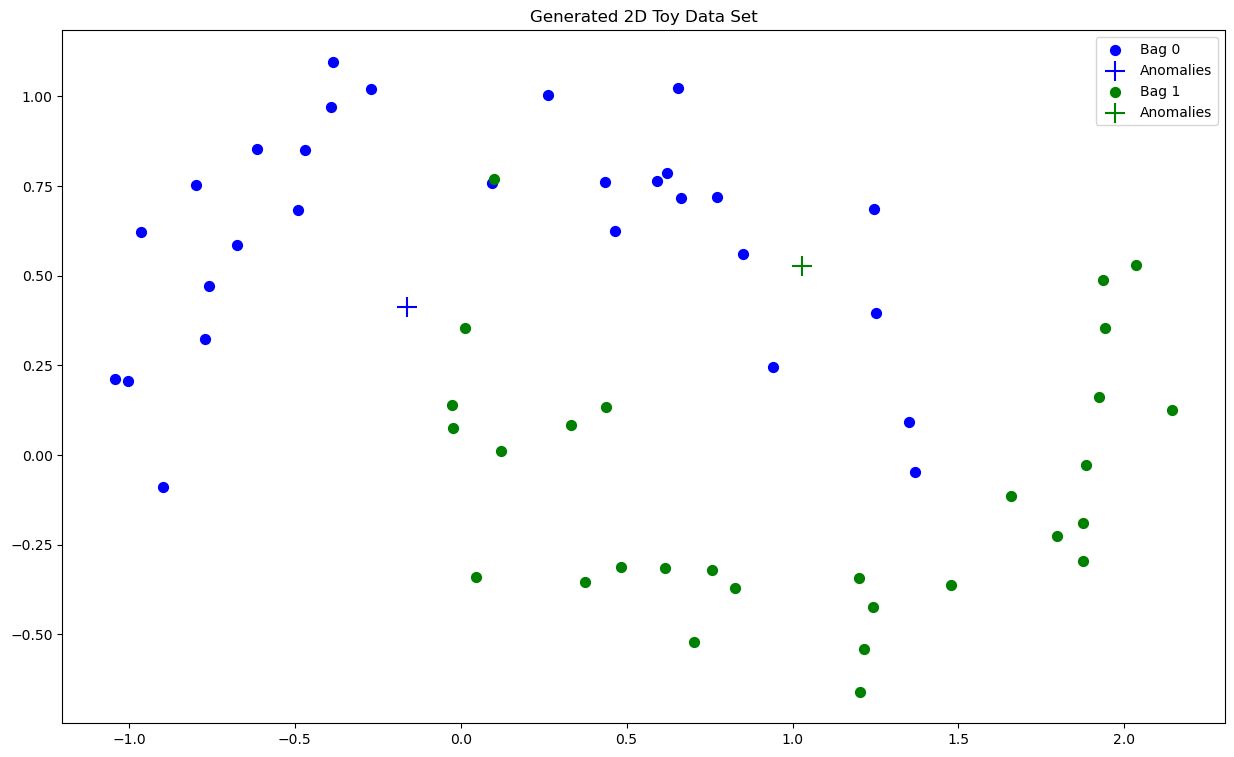

In [8]:
## Create toy data set

from itertools import cycle
cycol = cycle(clrs)

fig, ax = plt.subplots( nrows=1, ncols=1, figsize = (15,9) )  # create figure & 1 axis

for bag in range(len(bags)):
    domain = bags[bag]
    anomalies = []
    normals = []
    D[bag] = np.asarray(domain.tolist())

    for idx in range(len(domain)):
        if dataBag.isAnomaly(bag, idx):
            anomalies.append(domain[idx])
        else:
            normals.append(domain[idx])

    anomalies = np.asarray(anomalies)
    normals = np.asarray(normals)
    
    c=next(cycol)
    if (len(normals)>0):
        ax.scatter(normals[:,0], normals[:,1], marker='.', c=c, s=200, label = "Bag "+str(bag))#, c= 'b')
    if (len(anomalies)>0):
        ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', c=c, s=200, label = "Anomalies")#,c= 'b')

'''for bag in range(len(bags)):
    domain = bags[bag]
    if (len(domain)>0):
        ax.scatter(domain[:,0], domain[:,1], c=next(cycol))'''
        

plt.title('Generated 2D Toy Data Set')
plt.legend()
plt.savefig('img/original.png',bbox_inches='tight')
plt.show()
plt.close(fig)


In [9]:
from alignflow_master.dataReplacer import DataReplacer

dataReplacer = DataReplacer(nbags)
x = {}
for key, v in D.items():
    x[key] = v[:,:2].copy()
dataReplacer.setInitData(x)

In [10]:
from data import Data
from methods import MABMethod

## Create 2 domains
training_data = Data(nbags)
print(nbags)
print(D)
training_data.set_domains_and_labels(D)
originaldata = D
query_budget =10# nbags*k#30# 30*10
alba = MABMethod(mab="rotting-swa", query_budget=query_budget, verbose=True, rewardInfo=rewardInfo , al_strategy = al_strategy)


2
{0: array([[ 0.94231519,  0.24629817],
       [-0.49067437,  0.68312297],
       [-0.79860457,  0.75306864],
       [ 1.25018764,  0.39740717],
       [-0.9633856 ,  0.62139125],
       [ 0.62112871,  0.78731775],
       [-0.76987301,  0.32357835],
       [-1.00423573,  0.20640267],
       [ 0.2635208 ,  1.00433771],
       [-0.67419301,  0.58588407],
       [-0.39016929,  0.97104344],
       [-0.75943542,  0.47050095],
       [ 1.24549878,  0.6871583 ],
       [ 0.09387172,  0.75829543],
       [-0.89727453, -0.08931905],
       [-0.46961034,  0.84984463],
       [-0.61314433,  0.85281769],
       [-1.04143658,  0.21341302],
       [ 0.66518208,  0.71687422],
       [ 0.77124109,  0.71820822],
       [ 1.35149308,  0.09338198],
       [-0.27114998,  1.02154105],
       [ 1.36924425, -0.04741855],
       [-0.38422389,  1.09634963],
       [ 0.85152908,  0.56147261],
       [ 0.46639674,  0.62365811],
       [ 0.65455915,  1.0243499 ],
       [ 0.59281772,  0.76520481],
       [ 0.434

In [11]:
labeledPos = {}
labeledNeg = {}
for bag in range(len(bags)):
    labeledNeg[bag] = []
    labeledPos[bag] = []
performance = []

import transfer_learning_seperateArms as tl
clsf = tl.get_transfer_classifier(
        "none", "anomaly"
    )  
clsf.apply_transfer(training_data)
clsf.fit_all(training_data, ignore_unchanged=False)
probs = clsf.predict(training_data, True)

none


In [12]:
import os
import pathlib
try:
    os.remove(os.path.join(pathlib.Path().parent.resolve(), "alignflow_master", "ckpts", "normalaligner", "best.pth.tar"))
except Exception as exc:
    print("No model found to remove")

No model found to remove


In [13]:
from alignflow_master.train_copyFullDataset import main

dataReplacer.setData(x)
print(dataReplacer.getWeights())
aligner = main(dataReplacer, y_inst, load)
D = dataReplacer.getLatent()
weights = dataReplacer.getWeights()
bags = np.array(list(D.values()))

{0: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 1: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)}
Starting new model
False
START 1709910088.3164248
[start of epoch 1]
[epoch: 1, iter: 30 / 30, time: 0.00] loss_g: 8.73, loss_gan: 1.34, loss_mle: 7.39, loss_d: 0.856
[end of epoch 1, epoch time: 7.59]
[start of epoch 6]
[epoch: 6, iter: 30 / 30, time: 0.00] loss_g: 7.57, loss_gan: 1.35, loss_mle: 6.22, loss_d: 0.844
[end of epoch 6, epoch time: 0.35]
[start of epoch 11]
[epoch: 11, iter: 30 / 30, time: 0.00] loss_g: 6.71, loss_gan: 1.34, loss_mle: 5.37, loss_d: 0.834
[end of epoch 11, epoch time: 0.32]
[start of epoch 16]
[epoch: 16, iter: 30 / 30, time: 0.00] loss_g: 5.91, loss_gan: 1.34, loss_mle: 4.57, loss_d: 0.823
[end of epoch 16, epoch time: 0.34]
[start of epoch 21]
[epoch:

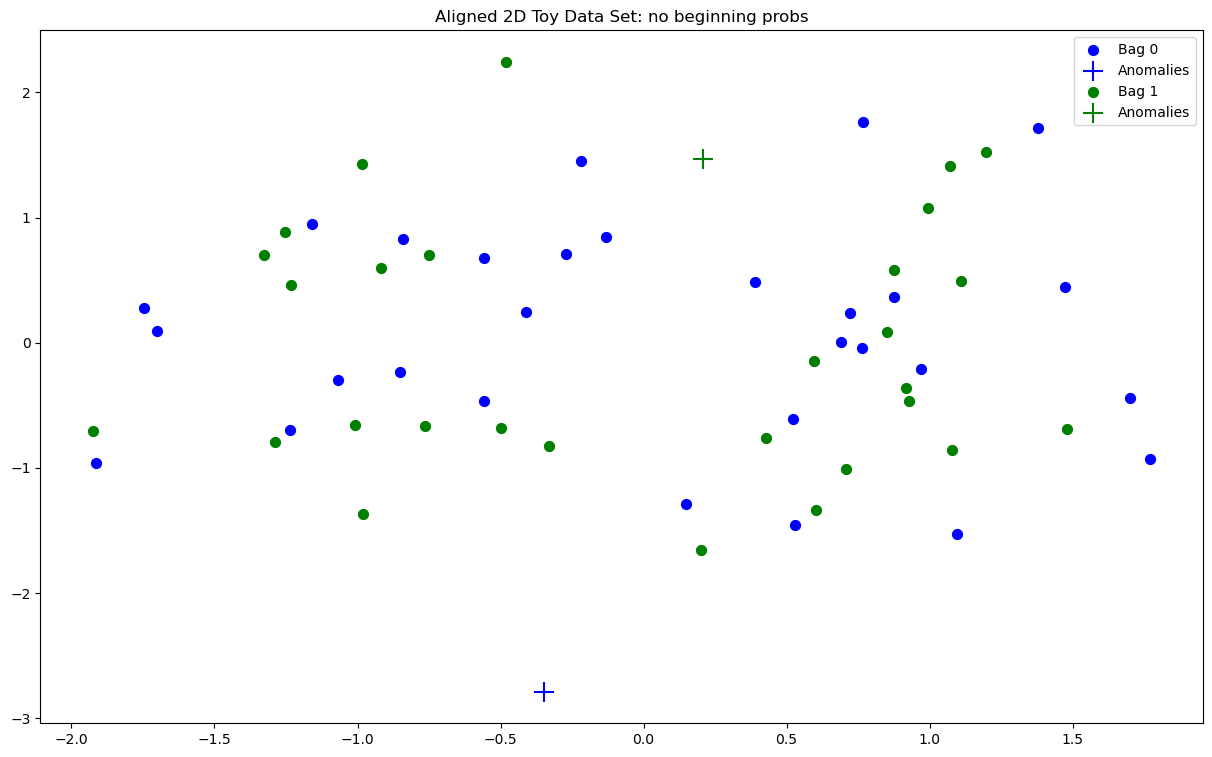

In [14]:
from itertools import cycle
cycol = cycle(clrs)

fig, ax = plt.subplots( nrows=1, ncols=1, figsize = (15,9) )  # create figure & 1 axis

for bag in range(len(bags)):
    domain = bags[bag]
    anomalies = []
    normals = []
    D[bag] = np.asarray(domain.tolist())

    for idx in range(len(domain)):
        if dataBag.isAnomaly(bag, idx):
            anomalies.append(domain[idx])
        else:
            normals.append(domain[idx])

    anomalies = np.asarray(anomalies)
    normals = np.asarray(normals)
            
    c=next(cycol)
    if (len(normals)>0):
        ax.scatter(normals[:,0], normals[:,1], marker='.', c=c, s=200, label = "Bag "+str(bag))#, c= 'b')
    if (len(anomalies)>0):
        ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', c=c, s=200, label = "Anomalies")#,c= 'b')   

        '''for bag in range(len(bags)):
            domain = bags[bag]
            if (len(domain)>0):
                ax.scatter(domain[:,0], domain[:,1], c=next(cycol))'''
                

plt.title('Aligned 2D Toy Data Set: no beginning probs')
plt.legend()
plt.show()
plt.close(fig)

In [15]:
from collections import OrderedDict
from transfer_learning import get_transfer_classifier




def predict(test_data, probabilities=False):
        classifier = get_transfer_classifier("none", "anomaly")  # could be none
        classifier.apply_transfer(test_data)
        classifier.fit_all(test_data, ignore_unchanged=False)



        predictions = OrderedDict({})
        X = np.zeros((0,2))
        nl = np.zeros((1))
        for key in test_data.keys_:
            X = np.concatenate((X,test_data.get_domain(key)))
            nl = np.append(nl, len(list(X)))
        prs = classifier.predict(0, X, probabilities)
        for key in test_data.keys_:
            predictions[key] = prs[int(nl[key]):int(nl[key+1])]

        return predictions

none
scores 0.0 1.0
xx 0.0 0.6539982331810357


C:\Users\vanma\AppData\Local\Temp\ipykernel_19440\492210171.py:49: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k', label = "Real anomaly")#,c= 'b')
C:\Users\vanma\AppData\Local\Temp\ipykernel_19440\492210171.py:52: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k')#,c= 'b')


roc 0.8620689655172414
pr 0.17003676470588236


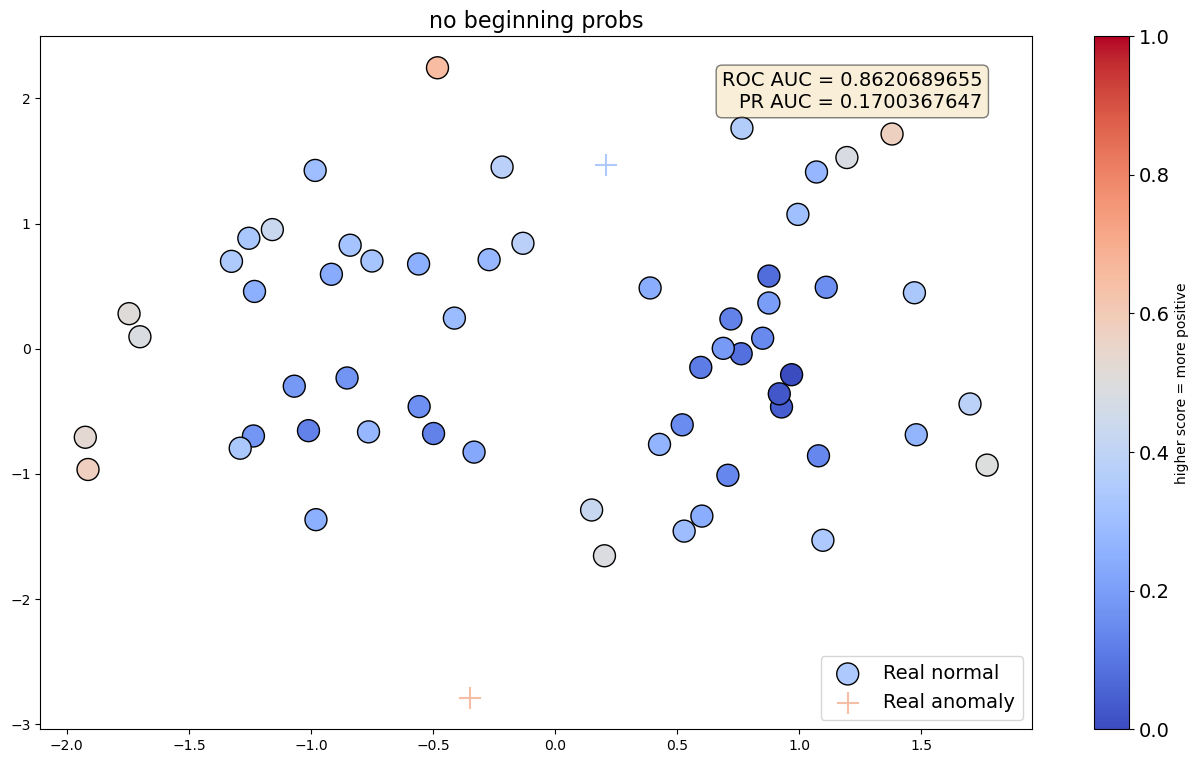

In [16]:

newtr = Data(nbags)
newtr.set_domains_and_labels(D)
pplot(bags, probs = predict(newtr, True), weights = weights, dataBag=dataBag, name = "no beginning probs")

In [17]:

os.remove(os.path.join(pathlib.Path().parent.resolve(), "alignflow_master", "ckpts", "normalaligner", "best.pth.tar"))

Add min max normalization to the probabiltiies!

In [18]:
def predictBegin(test_data):
        import transfer_learning_seperateArms as tl
        clsf = tl.get_transfer_classifier(
                "none", "anomaly"
            )  
        clsf.apply_transfer(test_data)
        clsf.fit_all(test_data, ignore_unchanged=False)
        probs = clsf.predict(test_data, True)

        
        minim, maxim = np.Inf, -np.Inf
        for k,v in probs.items():
            m = np.min(v) 
            if m < minim:
                 minim = m
            m = np.max(v)
            if m > maxim:
                 maxim = m
                 
        predictions = {}
        allprobs = np.zeros((0))
        for k,v in probs.items():
            predictions[k] = (v-minim)/(maxim-minim)
            allprobs = np.concatenate((allprobs, predictions[k]))

        CONT_FACTOR = .1
        LENGTH = np.shape(allprobs)[0]
        thr_idx = LENGTH - int(np.ceil(LENGTH*CONT_FACTOR))
        idxs = np.argsort(allprobs)
        threshold = np.sum(allprobs[idxs[thr_idx-1:thr_idx+1]])/2
        
        summm = 0
        newpredictions = {}
        for k,v in predictions.items():
            probabs = v/threshold
            newpredictions[k] = 1-np.power(2, -probabs)
            summm += np.sum(newpredictions[k]>=.5)

        return newpredictions

In [19]:
from alignflow_master.train_copyFullDataset import main

newprobs = predictBegin(training_data)

print(newprobs)

dataReplacer.setData(x)
dataReplacer.setWeights(newprobs)
aligner = main(dataReplacer, y_inst, load)
D = dataReplacer.getLatent()
weights = dataReplacer.getWeights()
bags = np.array(list(D.values()))

none
{0: array([0.34752261, 0.08517806, 0.12497767, 0.38471604, 0.26976302,
       0.0996706 , 0.29845095, 0.39443313, 0.42959559, 0.31738413,
       0.30207366, 0.32764069, 0.1762922 , 0.28064846, 0.49705672,
       0.20216133, 0.28851972, 0.47941385, 0.        , 0.08915181,
       0.55993013, 0.35725255, 0.63326532, 0.50292606, 0.29771971,
       0.23967813, 0.21377606, 0.07996194, 0.19553958, 0.41368016]), 1: array([0.20409233, 0.3940467 , 0.13625445, 0.49591653, 0.51610912,
       0.37355519, 0.22955637, 0.25388867, 0.20800684, 0.30679964,
       0.29661684, 0.24859517, 0.24341551, 0.40596062, 0.07418157,
       0.19630747, 0.24727291, 0.25898117, 0.31203871, 0.45224432,
       0.51295399, 0.68501143, 0.49488751, 0.40960279, 0.06258212,
       0.30374826, 0.20725769, 0.49231936, 0.38843898, 0.47059135])}
Starting new model
False
START 1709910171.3687146
[start of epoch 1]
[epoch: 1, iter: 30 / 30, time: 0.00] loss_g: 19.8, loss_gan: 0.937, loss_mle: 18.8, loss_d: 0.685
[end of epoc

C:\Users\vanma\AppData\Local\Temp\ipykernel_19440\492210171.py:49: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k', label = "Real anomaly")#,c= 'b')
C:\Users\vanma\AppData\Local\Temp\ipykernel_19440\492210171.py:52: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k')#,c= 'b')


roc 0.7931034482758621
pr 0.07202380952380952


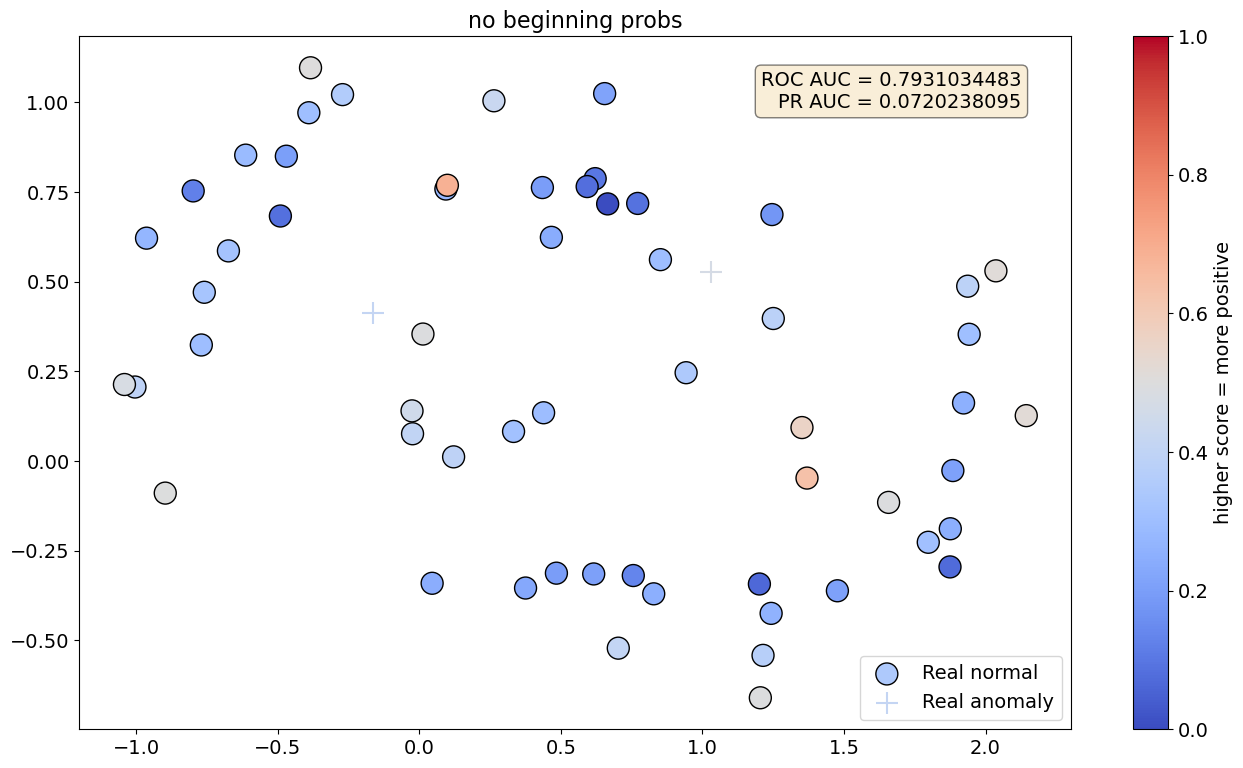

In [20]:
ww = {}
for k, v in weights.items():
    ww[k] = np.zeros_like(v)

pplot(originalbags, probs = weights, weights = ww, dataBag=dataBag, name = "no beginning probs")

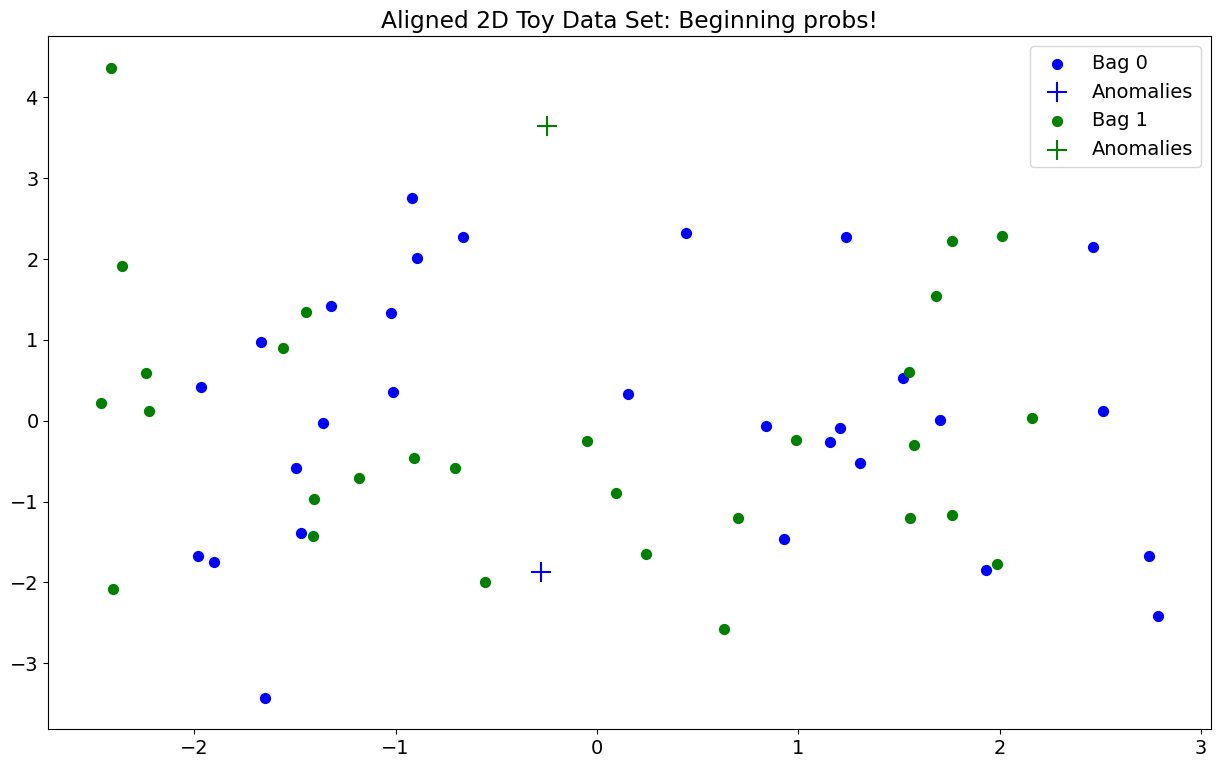

In [21]:
from itertools import cycle
cycol = cycle(clrs)

fig, ax = plt.subplots( nrows=1, ncols=1, figsize = (15,9) )  # create figure & 1 axis

for bag in range(len(bags)):
    domain = bags[bag]
    anomalies = []
    normals = []
    D[bag] = np.asarray(domain.tolist())

    for idx in range(len(domain)):
        if dataBag.isAnomaly(bag, idx):
            anomalies.append(domain[idx])
        else:
            normals.append(domain[idx])

    anomalies = np.asarray(anomalies)
    normals = np.asarray(normals)
            
    c=next(cycol)
    if (len(normals)>0):
        ax.scatter(normals[:,0], normals[:,1], marker='.', c=c, s=200, label = "Bag "+str(bag))#, c= 'b')
    if (len(anomalies)>0):
        ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', c=c, s=200, label = "Anomalies")#,c= 'b')   

        '''for bag in range(len(bags)):
            domain = bags[bag]
            if (len(domain)>0):
                ax.scatter(domain[:,0], domain[:,1], c=next(cycol))'''
                

plt.title('Aligned 2D Toy Data Set: Beginning probs!')
plt.legend()
plt.show()
plt.close(fig)

none
scores 0.0 1.0
xx 0.0 0.7615890414653324
roc 0.7327586206896551
pr 0.14868951612903225


C:\Users\vanma\AppData\Local\Temp\ipykernel_19440\492210171.py:49: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k', label = "Real anomaly")#,c= 'b')
C:\Users\vanma\AppData\Local\Temp\ipykernel_19440\492210171.py:52: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k')#,c= 'b')


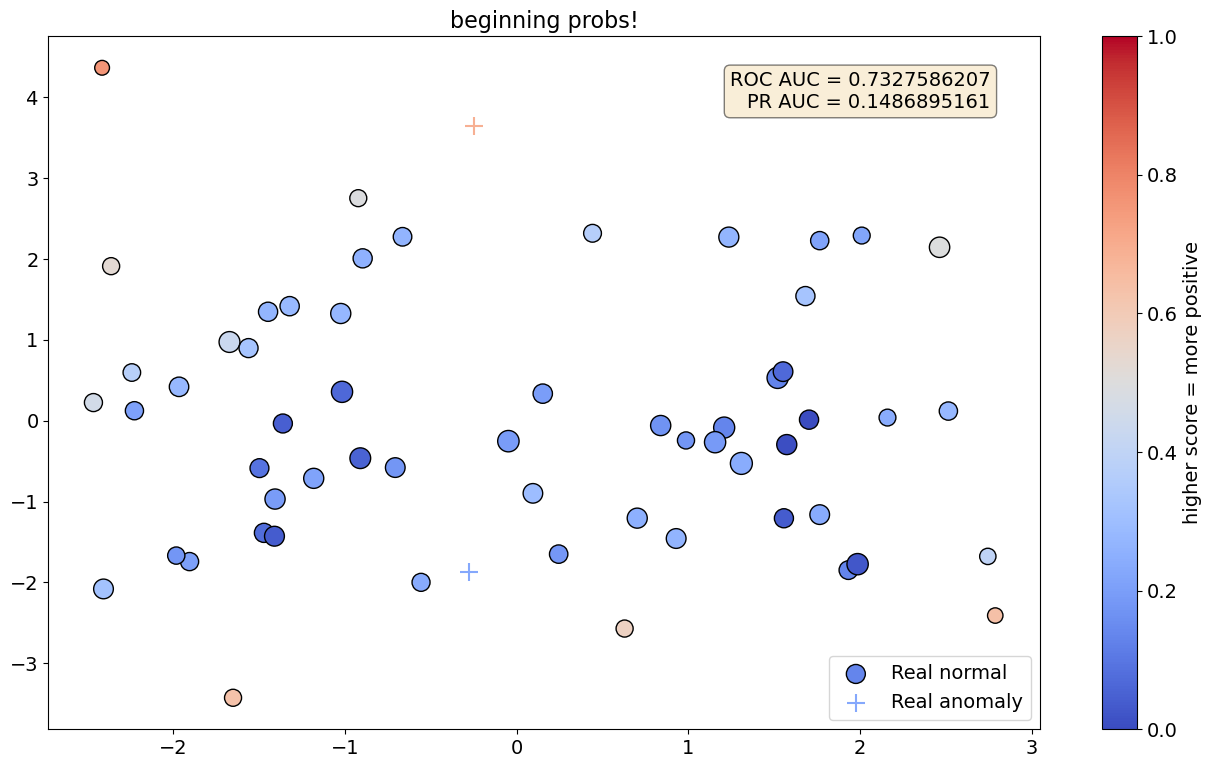

In [22]:
newtr = Data(nbags)
newtr.set_domains_and_labels(D)
pplot(bags, probs = predict(newtr, True), weights = weights, dataBag=dataBag, name = "beginning probs!")